In [1]:
# ====== Import modules and apply setting
import kml2geojson
import geopandas as gpd
import pandas as pd
import fiona
import folium

In [2]:
# ====== Read the KML file
file = 'onx-markups-12162024.kml'
gdf_list = []
for layer in fiona.listlayers(file) :    
    gdf = gpd.read_file(file, driver='LIBKML', layer=layer)
    gdf_list.append(gdf)

gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

,Name,Description,geometry
0,Spray Area,,"POLYGON ((-92.61919 39.0232, -92.61893 39.0231..."


<Axes: >

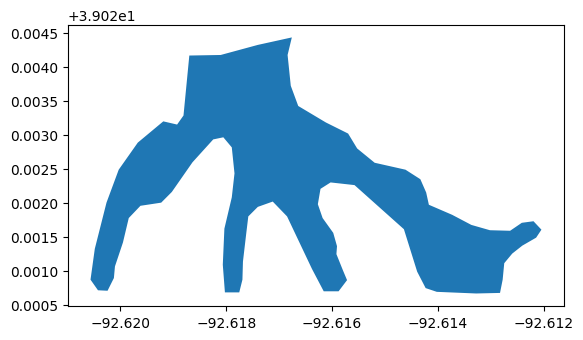

In [3]:
# ====== View the data and plot the shape
display(gdf)
gdf.plot()

In [4]:
# ====== Prepare the data for a map
gdf.to_crs("EPSG:32615")
gdf.crs
gdf['centroid'] = gdf['geometry'].centroid

# Extract the latitude from the centroid
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

# Display the gdf
display(gdf)

# Convert the geometry to geojson
geojson = gdf['geometry'].to_json()
display(geojson)

/var/folders/mb/hrcscvqd5zqbnx2014v04fnw0000gp/T/ipykernel_30284/2323685927.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


,Name,Description,geometry,centroid,latitude,longitude
0,Spray Area,,"POLYGON ((-92.61919 39.0232, -92.61893 39.0231...",POINT (-92.61676 39.02235),39.022348,-92.616756


'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[-92.61919, 39.023202], [-92.618929, 39.023155], [-92.618808, 39.023288], [-92.618698, 39.024169], [-92.618105, 39.024177], [-92.617403, 39.024325], [-92.61676, 39.024435], [-92.61684, 39.024177], [-92.61678, 39.023725], [-92.616639, 39.023428], [-92.616117, 39.023186], [-92.615696, 39.023023], [-92.615525, 39.022804], [-92.615194, 39.022594], [-92.614611, 39.022492], [-92.61433, 39.022352], [-92.61422, 39.022157], [-92.614169, 39.021977], [-92.613728, 39.021829], [-92.613366, 39.021681], [-92.613015, 39.021603], [-92.612633, 39.021595], [-92.612412, 39.021712], [-92.612191, 39.021735], [-92.612041, 39.021611], [-92.612141, 39.021494], [-92.612402, 39.021377], [-92.612593, 39.02126], [-92.612744, 39.021119], [-92.612774, 39.020877], [-92.612824, 39.020682], [-92.613276, 39.020674], [-92.614019, 39.020698], [-92.61423, 39.020753], [-92.61439, 39.0

In [5]:
# ====== Create a folium map
m = folium.Map(location=[gdf['latitude'][0], gdf['longitude'][0]], zoom_start=17)

# Add markers for each point in the GeoDataFrame
folium.GeoJson(
    geojson,
    style_function=lambda x: {'color': 'red', 'weight': 2, 'fillOpacity': 0}
).add_to(m)

folium.TileLayer(
    tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr = 'Esri',
    name = 'Esri Satellite',
    overlay = False,
    control = True
   ).add_to(m)

folium.LayerControl().add_to(m)

display(m)


In [6]:
# ====== Export geojson data to geojson file
del gdf['centroid']
gdf.to_file('area.geojson', driver='GeoJSON')